### Hard Work Pays Off (Challenge)
#### We are using a single Feature Dataset

In [1]:
%config Completer.use_jedi=False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
import pandas as pd

### Section 1 - Load and Visualise the Data
- Download
- Load 
- Visualise
- Normalisation

(3750, 1) (3750, 1)


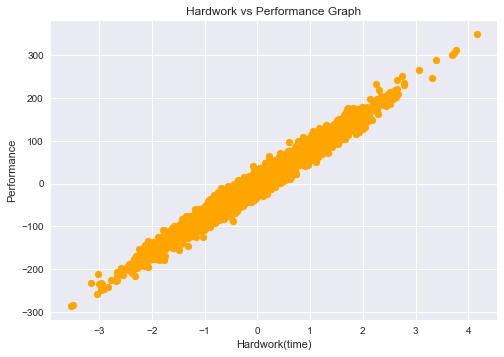

In [3]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Training Data/Linear_Y_Train.csv')
print(X.shape,y.shape)

# Convert X,y to Numpy arrays
X = X.values
y = y.values

# Normalisation
# Here X is a single feature matrix (ie,.column vector)

u = X.mean()
std = X.std()
X = (X-u)/std

# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork(time)")
plt.ylabel("Performance")
plt.show()

### Section 2 - Linear Regression

In [4]:
def hypothesis(x,theta):
    #theta=[theta0,theta1]
    #Calculates y(prdict)
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,)) # Initialize theta (theta0,theta1)
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

# Mean Square Error:-

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        # here e is a numpy array of size 1
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [5]:
theta,error_list,theta_list = gradientDescent(X,y)

In [6]:
theta

array([ 0.6838508 , 79.90361453])

In [27]:
theta_list

array([[6.83868968e-02, 7.99057369e+00],
       [1.29935104e-01, 1.51820900e+01],
       [1.85328490e-01, 2.16544547e+01],
       [2.35182538e-01, 2.74795829e+01],
       [2.80051181e-01, 3.27221983e+01],
       [3.20432960e-01, 3.74405522e+01],
       [3.56776561e-01, 4.16870707e+01],
       [3.89485801e-01, 4.55089373e+01],
       [4.18924118e-01, 4.89486173e+01],
       [4.45418603e-01, 5.20443292e+01],
       [4.69263640e-01, 5.48304700e+01],
       [4.90724172e-01, 5.73379967e+01],
       [5.10038652e-01, 5.95947707e+01],
       [5.27421684e-01, 6.16258673e+01],
       [5.43066412e-01, 6.34538543e+01],
       [5.57146668e-01, 6.50990426e+01],
       [5.69818898e-01, 6.65797120e+01],
       [5.81223905e-01, 6.79123145e+01],
       [5.91488411e-01, 6.91116567e+01],
       [6.00726467e-01, 7.01910648e+01],
       [6.09040717e-01, 7.11625320e+01],
       [6.16523542e-01, 7.20368525e+01],
       [6.23258085e-01, 7.28237409e+01],
       [6.29319173e-01, 7.35319405e+01],
       [6.347741

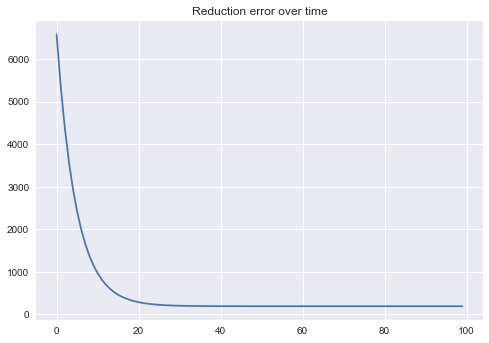

In [8]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

### Section - 3 Predictions and Best Line

In [9]:
y_ = hypothesis(X,theta)
print(y_.shape)
print(y_)

(3750, 1)
[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


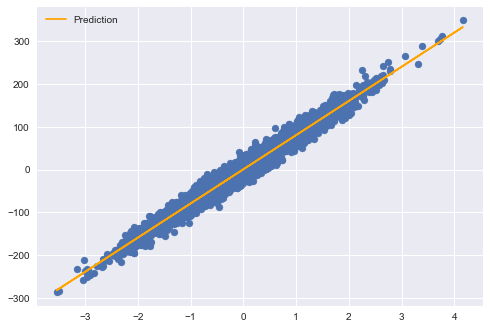

In [10]:
# visualizing -> Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [11]:
# Load the test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [12]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [13]:
df.to_csv('y_prediction.csv',index=False)

### Section - 4 Computing Score
Score : R2 (R-Squared) or Coefficient of Determination



In [14]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast(Parallelism)
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [15]:
r2_score(y,y_)

97.09612226971643

### Section - 5 Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [17]:
theta

array([ 0.6838508 , 79.90361453])

In [18]:
# Loss Actually 

T0 = np.arange(-40,40,1) #Theta 0 lies in this range
T1 = np.arange(40,120,1) #Theta 1 lies in this range

T0,T1 = np.meshgrid(T0,T1) # Generate a surface (T0 and T1 are a 2d grid)
J = np.zeros(T0.shape)
# Iterate over T0 and T1 (Both T0 and T1 have the same shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        #This is done on a single go without using a loop
        y_ = T1[i,j]*X + T0[i,j] # Hypothesis=theta1*x+theta0
        J[i,j] = np.sum((y-y_)**2)/y.shape[0] # Mean Square Loss
        
# print(T0.shape,T1.shape)
# print(J.shape)

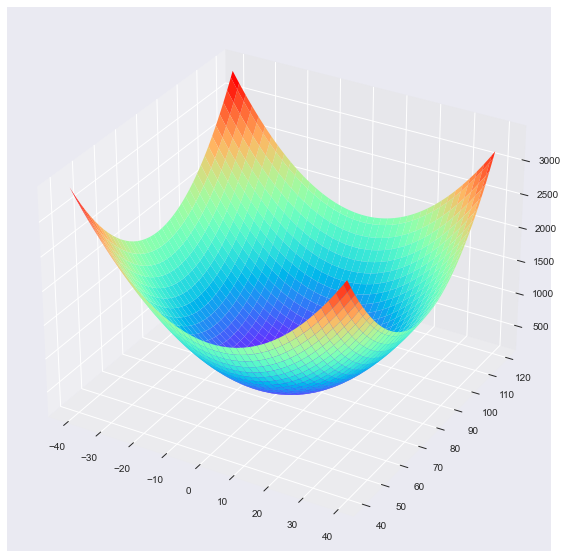

In [19]:
# Visualise the J (Loss)

fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

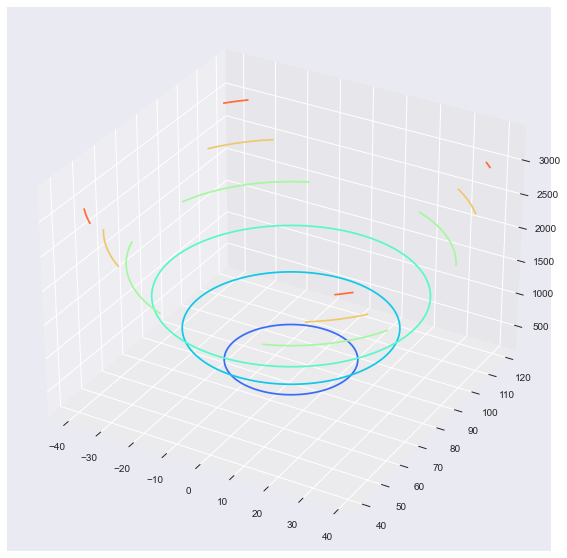

In [20]:
# Contour Plot 
fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

###  Plot the changes in values of theta

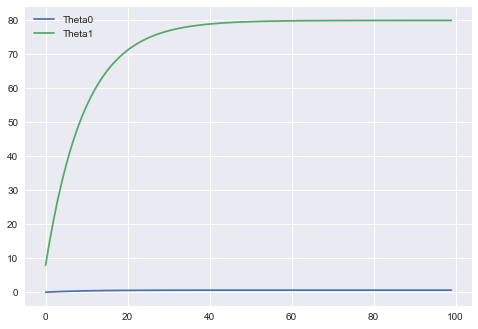

In [21]:
# Plot the values of theta

theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

## Trajectory traced by Theta Updates in the Loss Function

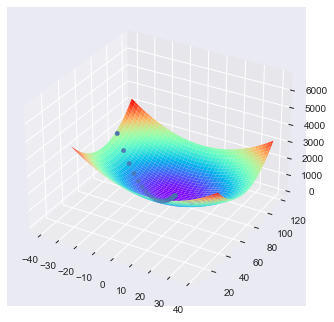

In [22]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
# Since it is a 3d plot.Therefore we need three parameters
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

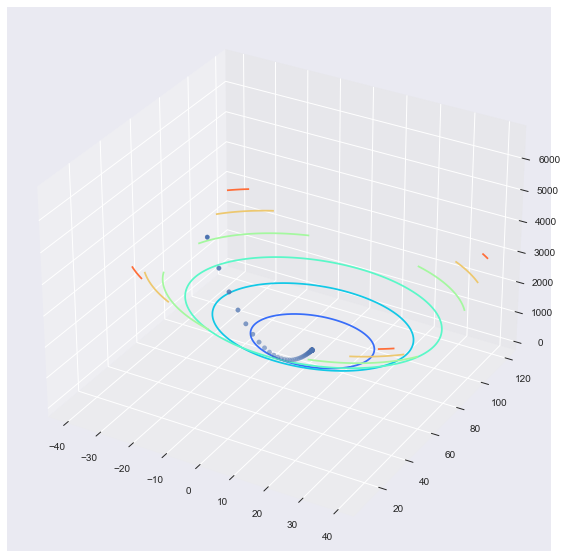

In [23]:
fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

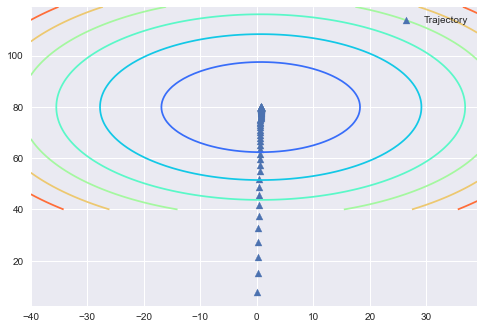

In [24]:
# 2D Contour Plot (top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

In [25]:
# Save the data in file
theta_list
np.save("ThetaList.npy",theta_list)

In [26]:
# We have created a interactive_plot.py file that shows how theta changes.